In [1]:
import pandas as pd
import ast
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter
import string
import re
import nltk
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
%matplotlib inline

[nltk_data] Downloading package stopwords to /Users/donor/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
jobs = pd.read_csv('/Users/donor/PycharmProjects/DE_job_market/nlp/english_jobs_ner.csv', index_col=[0])
jobs

,url,title,company,location,type,industry,remote,created_at,text,processed_text,lang,length_text,technos
0,https://datai.jobs/job/lyft-data-engineer-kyiv...,Data Engineer – Kyiv,Lyft,"Kyiv, Ukraine",Full Time,Vehicles & Autonomous Mobility,Inconnu,2021-12-27,"At Lyft, our mission is to improve people’s li...",lyft mission improve people life world best tr...,en,2672,"['S3', 'Flyte', 'ETL', 'Stackdriver', 'Kafka',..."
1,https://datai.jobs/job/chargepoint-data-engine...,Data Engineer,ChargePoint,Amsterdam,Full Time,Vehicles & Autonomous Mobility,Inconnu,2021-12-27,Data Engineer\nAbout Us\nWith electric vehicle...,data engineer u electric vehicle ev expected n...,en,3229,"['mlflow', 'nodejs', 'airflow', 'Python', 'Air..."
2,https://datai.jobs/job/spotify-data-engineer-e...,Data Engineer – Experience,Spotify,Stockholm,Full Time,Entertainment,Inconnu,2021-12-27,Delivering the best Spotify experience possibl...,delivering best spotify experience possible ma...,en,4143,"['Dataflow', 'Kubeflow', 'Pub/Sub', 'BigQuery'..."
3,https://datai.jobs/job/spotify-staff-data-engi...,Staff Data Engineer – Experience,Spotify,Stockholm,Full Time,Entertainment,Inconnu,2021-12-27,Delivering the best Spotify experience possibl...,delivering best spotify experience possible ma...,en,5233,"['Scala', 'Python', 'Java']"
4,https://datai.jobs/job/spotify-data-engineer-s...,Data Engineer,Spotify,Stockholm,Full Time,Entertainment,Inconnu,2021-12-27,The Platform team creates the technology that ...,platform team creates technology enables spoti...,en,4186,"['Scala', 'Google Cloud Platform', 'Python', '..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1050,https://www.welcometothejungle.com/fr/companie...,Data Engineer,GLOBAL SAVINGS GROUP,München,CDI,"AdTech / MarTech, E-commerce, IT / Digital",Inconnu,2022-01-25,"We are the Global Savings Group, the leading E...",global saving group leading european commerce ...,en,3190,"['S3', 'Hadoop', 'Scala', 'Flink', 'Glue', 'EM..."
1057,https://www.welcometothejungle.com/fr/companie...,Data Engineer,Back Market,Bordeaux,CDI,"Collaborative Economy, E-commerce, Environment...",Inconnu,2022-01-25,BackMarket is the number one European (and soo...,backmarket number one european soon global mar...,en,4204,"['NoSQL', 'Kafka', 'Go', 'Spark', 'Participati..."
1064,https://www.welcometothejungle.com/fr/companie...,Data Engineer (Platform team),Veepee,Paris,CDI,E-commerce,Télétravail partiel possible,2022-01-25,"Avec VEEPEE, le groupe vente-privee ouvre un n...",veepee groupe venteprivee ouvre nouveau chapit...,en,5032,"['Grafana', 'PostgreSQL', 'Kafka', 'Proficienc..."
1065,https://www.welcometothejungle.com/fr/companie...,Data Engineer (Remote),Stuart,N,CDI,"Collaborative Economy, Logistics",Télétravail total possible,2022-01-25,Stuart (DPD Group) is a sustainable 🌱 last-mil...,stuart dpd group sustainable lastmile delivery...,en,4097,"['S3', 'Redshift', 'Hadoop', 'Flink', 'Kafka',..."


In [3]:
all_technos = []
for technos in jobs.technos:
    technos = ast.literal_eval(technos)
    all_technos += technos

text = " ".join(tech for tech in all_technos)
text = text.lower()

tokens = word_tokenize(text)
counts = Counter(tokens)
counts.most_common()

[('python', 326),
 ('sql', 259),
 ('aws', 180),
 ('spark', 121),
 ('airflow', 117),
 ('java', 112),
 ('kafka', 95),
 ('bigquery', 81),
 ('kubernetes', 79),
 ('docker', 70),
 ('scala', 68),
 ('redshift', 66),
 ('azure', 61),
 ('snowflake', 59),
 ('google', 53),
 ('elasticsearch', 51),
 ('hadoop', 51),
 ('dbt', 47),
 ('tensorflow', 45),
 ('r', 43),
 ('tableau', 43),
 ('cloud', 41),
 ('go', 40),
 ('s3', 35),
 ('looker', 35),
 ('flink', 35),
 ('nosql', 34),
 ('apache', 30),
 ('postgresql', 28),
 ('beam', 27),
 ('mysql', 27),
 ('grafana', 24),
 ('javascript', 24),
 ('linux', 24),
 ('fire', 24),
 ('hive', 23),
 ('platform', 22),
 ('mongodb', 22),
 ('prometheus', 22),
 ('swile', 22),
 ('react', 21),
 ('athena', 21),
 ('pandas', 19),
 ('microsoft', 18),
 ('http', 17),
 ('hdfs', 15),
 ('fivetran', 14),
 ('ruby', 14),
 ('redis', 14),
 ('emr', 14),
 ('luigi', 13),
 ('unix', 13),
 ('rabbitmq', 13),
 ('gcp', 13),
 ('jenkins', 13),
 ('php', 12),
 ('powerbi', 12),
 ('metabase', 12),
 ('sparksql', 12)

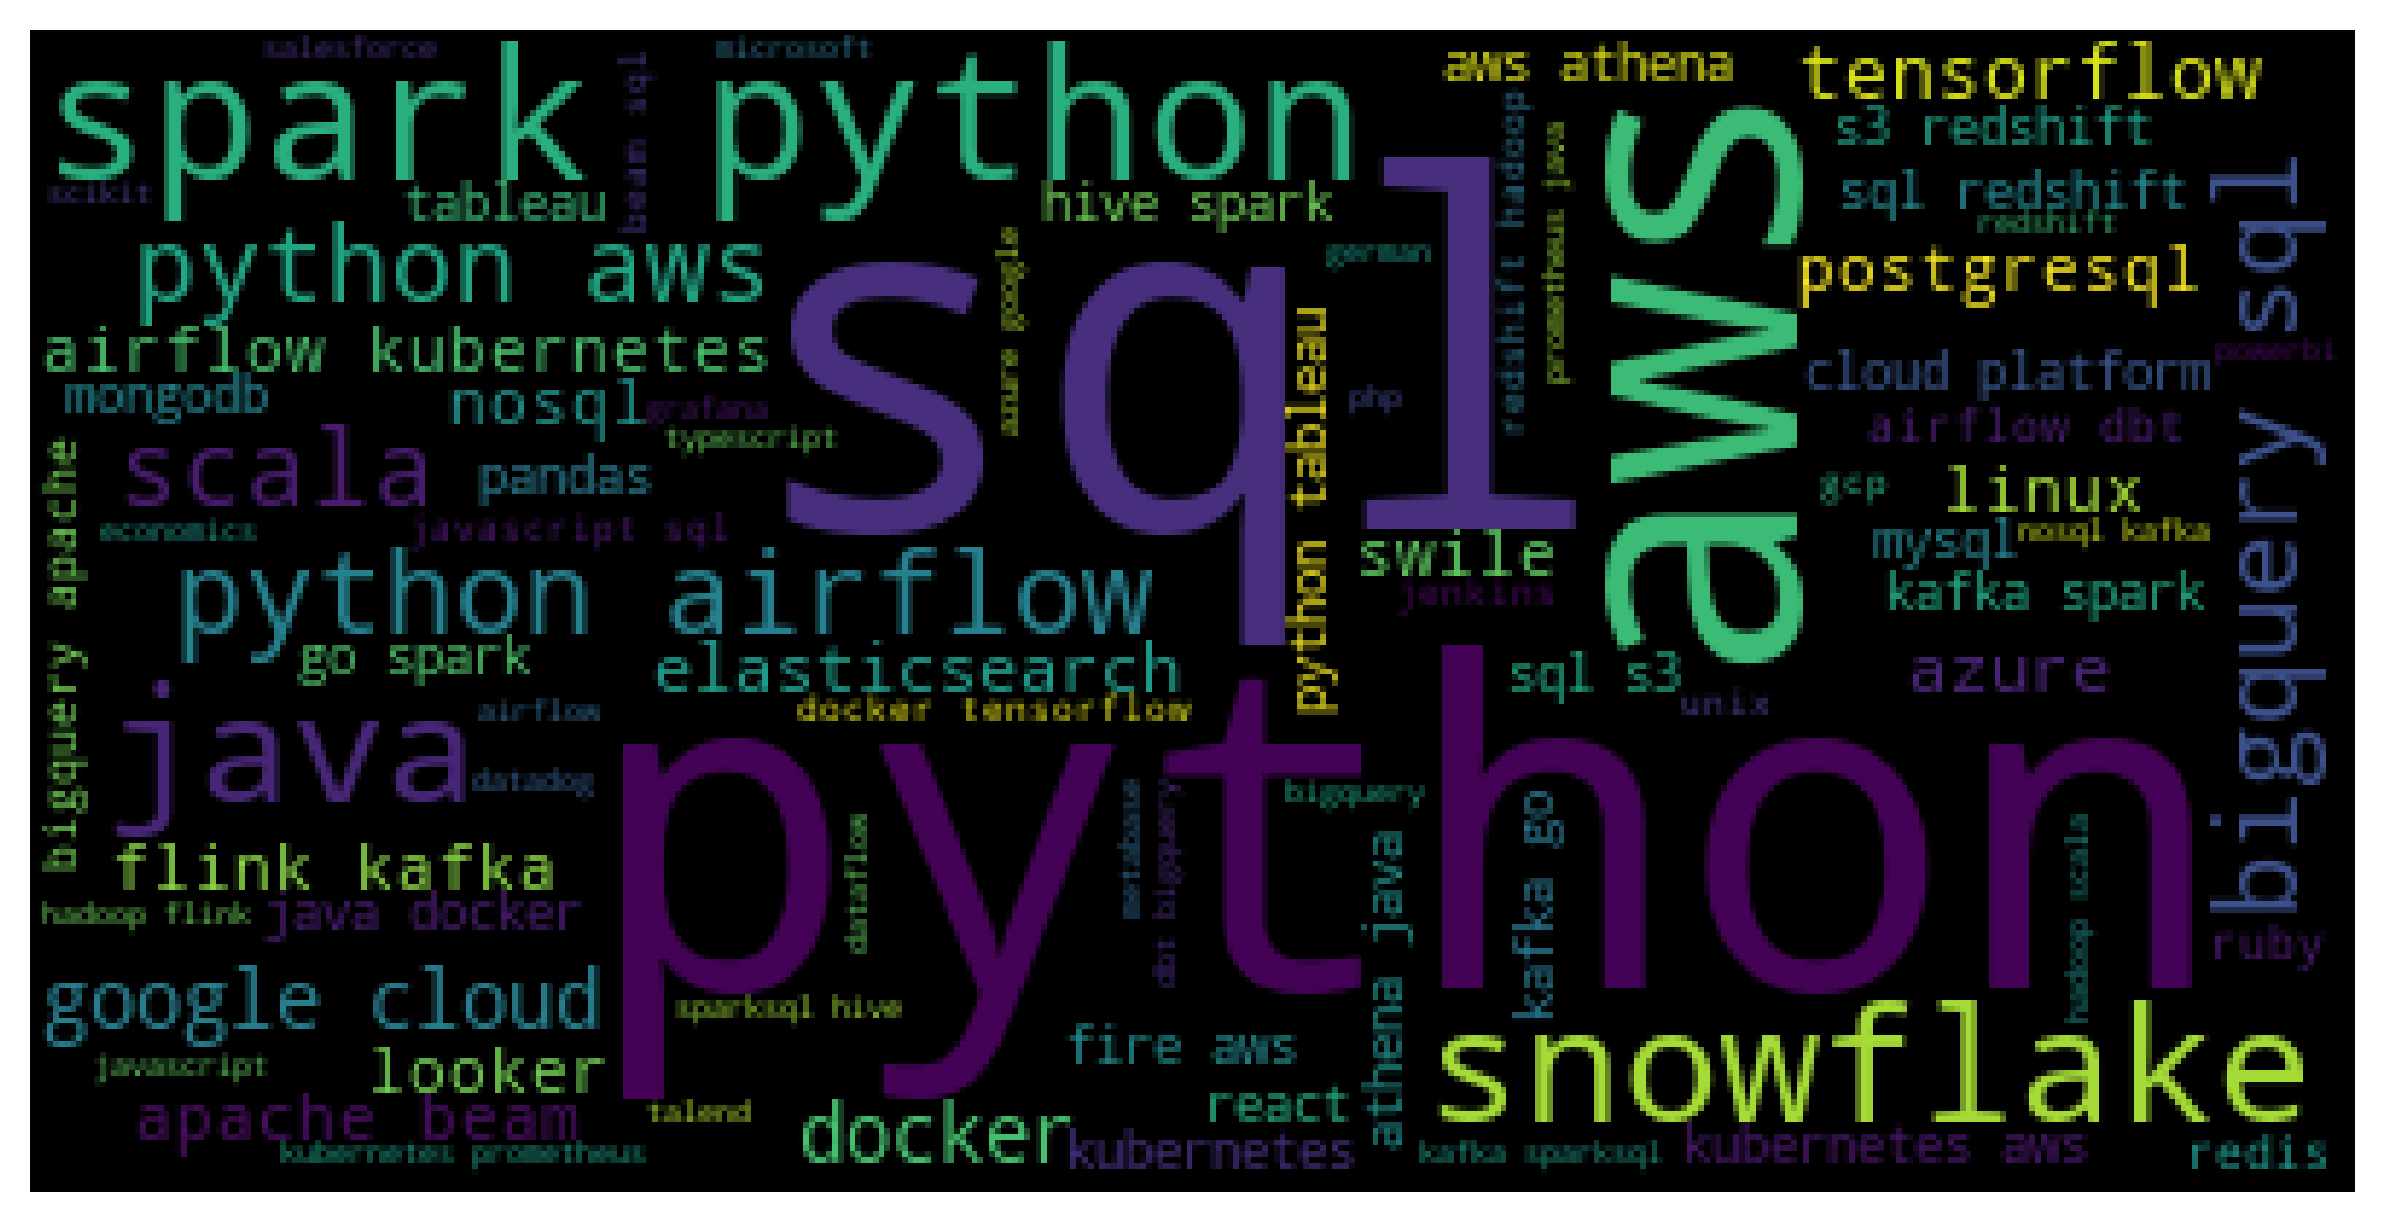

In [4]:
word_cloud = WordCloud(background_color = 'black', max_words=80).generate(text)

plt.figure(figsize=(10,10), dpi=300)
plt.axis('off')
plt.imshow(word_cloud)
plt.savefig('wordcloud.png');